In [1]:
import pandas as pd       # Data handling (e.g., price data, returns)
import numpy as np        # Numerical operations (e.g., mean, standard deviation)
import backtrader as bt  # Full-featured backtesting framework
from finta import TA    # Technical Analysis library (e.g., moving averages, RSI)
import QuantLib as ql   # Quantitative finance models, pricing, and calculations

import matplotlib.pyplot as plt   # Plotting results like returns or drawdowns
import seaborn as sns             # Enhanced visualizations (optional)
from scipy.stats import norm      # Used for probability calculations in finance
import quantstats
import riskfolio as rp
import yfinance as yf

In [2]:
ticker = "^NSEI"  # Symbol for NIFTY50 index

# Fetch data using yfinance
data = yf.download(
    tickers=ticker,
    interval="5m",       # 5-minute timescale
    period="1mo",         # Maximum period available for 5-minute data
    progress=False       # To suppress download progress
)

data

Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Datetime,,,,,
2024-12-02 03:45:00+00:00,24037.750000,24149.550781,24030.000000,24149.550781,0
2024-12-02 03:50:00+00:00,24032.300781,24057.599609,24022.300781,24037.500000,0
2024-12-02 03:55:00+00:00,24034.599609,24036.099609,24008.800781,24032.599609,0
2024-12-02 04:00:00+00:00,24087.650391,24090.449219,24030.949219,24033.050781,0
2024-12-02 04:05:00+00:00,24115.650391,24121.300781,24084.250000,24087.750000,0
...,...,...,...,...,...
2025-01-01 09:10:00+00:00,23767.500000,23791.500000,23764.599609,23788.750000,0
2025-01-01 09:15:00+00:00,23758.550781,23768.599609,23751.449219,23767.099609,0


In [3]:
data.columns = data.columns.droplevel(1)
data

Price,Close,High,Low,Open,Volume
Datetime,,,,,
2024-12-02 03:45:00+00:00,24037.750000,24149.550781,24030.000000,24149.550781,0
2024-12-02 03:50:00+00:00,24032.300781,24057.599609,24022.300781,24037.500000,0
2024-12-02 03:55:00+00:00,24034.599609,24036.099609,24008.800781,24032.599609,0
2024-12-02 04:00:00+00:00,24087.650391,24090.449219,24030.949219,24033.050781,0
2024-12-02 04:05:00+00:00,24115.650391,24121.300781,24084.250000,24087.750000,0
...,...,...,...,...,...
2025-01-01 09:10:00+00:00,23767.500000,23791.500000,23764.599609,23788.750000,0
2025-01-01 09:15:00+00:00,23758.550781,23768.599609,23751.449219,23767.099609,0
2025-01-01 09:20:00+00:00,23746.800781,23761.849609,23744.699219,23757.349609,0


In [4]:
data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

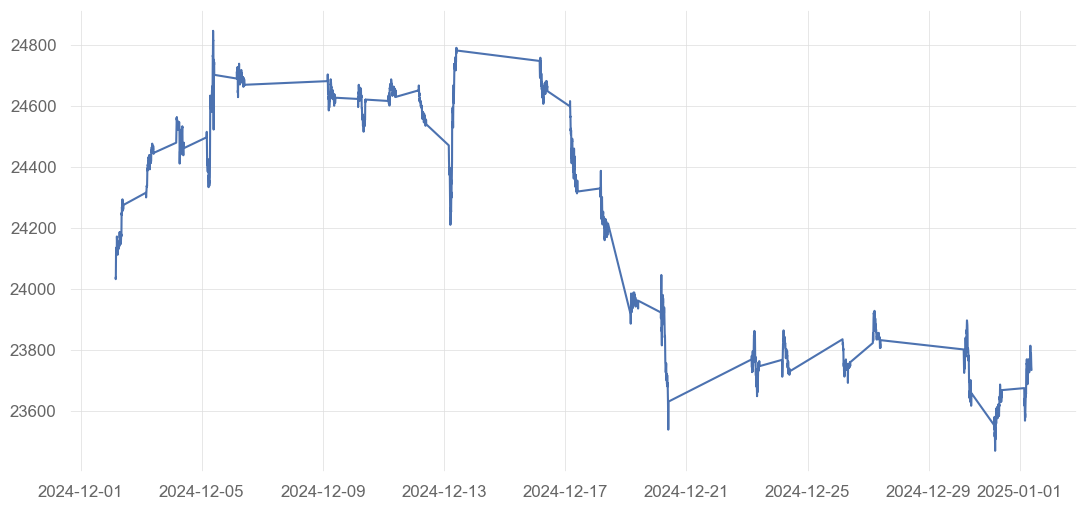

In [5]:
plt.figure(figsize=(13,6))
plt.plot(data['Close'])

# MEAN REVERSION TEST

## Augmented Dickey Fuller Test:

 Hypothesis: 
 - H0 : Unit roots (Non-stationary)
 - HA : Not all roots are unit values (Stationary)

In [6]:
from statsmodels.tsa.stattools import adfuller
def adf(time_series):
    res = adfuller(time_series)
    print(res)
    print("ADF Statistic: ", res[0])
    print("p-value: ", res[1])
    print("Critical Values: ", res[4])

adf(data["Close"])

(-0.822902297664051, 0.8123019564937906, 2, 1642, {'1%': -3.4343387651403106, '5%': -2.8633018108486343, '10%': -2.5677079480625067}, 14551.49165907973)
ADF Statistic:  -0.822902297664051
p-value:  0.8123019564937906
Critical Values:  {'1%': -3.4343387651403106, '5%': -2.8633018108486343, '10%': -2.5677079480625067}


### Test Results:

- **ADF Statistic**: -1.5407  
- **p-value**: 0.5133  
- **Critical Values**:  
    - 1%: -3.4574  
    - 5%: -2.8735  
    - 10%: -2.5731  

#### Conclusion:
- Since **p-value (0.5133) > 0.05**, we **fail to reject the null hypothesis**.  
- The data is **non-stationary**.

## Hurst Exponent:


The **Hurst exponent** is a statistical measure that evaluates the **long-term memory** and **self-similarity** of a time series. Developed by hydrologist **Harold Edwin Hurst**, it quantifies the tendency of a time series to either:

- Regress strongly to the mean,
- Persist in a trend, or
- Behave randretation

The **Hurst exponent**, denoted as **H**, ranges between 0 and 1:

- **0 < H < 0.5**:  
  - **Anti-persistent (mean-reverting) behavior**:  
    Increases are likely followed by decreases, and vice versa.

- **H = 0.5**:  
  - **Random walk (Brownian motion)**:  
    No correlation exists between past and future values.

- **0.5 < H < 1**:  
  - **Persistent (trending) behavior**:  
    Increases are likely followed by further increases, and decreases by further decreases.


In [20]:
import numpy as np

def hurst_exponent(time_series, max_lag=20):
    """
    Calculate the Hurst exponent of a time series using the R/S method.

    Parameters:
    - time_series: array-like
        The input time series.
    - max_lag: int
        The maximum lag to calculate R/S for (default is 20).

    Returns:
    - hurst: float
        The estimated Hurst exponent.
    """
    time_series = np.array(time_series)  # Ensure time_series is a numpy array
    lags = range(2, max_lag + 1)
    rs_values = []

    for lag in lags:
        # Split the series into chunks of the given lag size
        chunks = [time_series[i:i + lag] for i in range(0, len(time_series), lag)]
        rs = []

        for chunk in chunks:
            if len(chunk) < lag:
                continue  # Ignore incomplete chunks

            mean_chunk = np.mean(chunk)
            deviations = chunk - mean_chunk

            # Cumulative deviations
            cum_deviation = np.cumsum(deviations)

            # Range (R)
            R = np.max(cum_deviation) - np.min(cum_deviation)

            # Standard deviation (S)
            S = np.std(chunk)

            # Ensure S is scalar and greater than zero
            if np.isfinite(S) and S > 0:
                rs.append(R / S)

        # Average R/S for this lag
        if len(rs) > 0:
            rs_values.append(np.mean(rs))

    # Log-log regression to estimate the Hurst exponent
    if len(rs_values) > 1:
        log_lags = np.log(lags)
        log_rs = np.log(rs_values)
        hurst, _ = np.polyfit(log_lags, log_rs, 1)
        return hurst
    else:
        return np.nan  # Return NaN if not enough valid data for calculation

# Example usage
hurst = hurst_exponent(data['Close'])
print(f"Hurst Exponent: {hurst}")


Hurst Exponent: 0.9396604250242684


## Variance Ratio test

The Variance Ratio Test is a statistical test used to determine whether a time series follows a random walk or not. In finance, it is often applied to test for market efficiency by checking whether price changes are uncorrelated over time, a key characteristic of random walks.

Hypotheses:
- Null Hypothesis: The time series follows a random walk 
- Alternative Hypothesis: The time series does not follow a random walk 

In [31]:
import numpy as np

def variance_ratio_test(time_series, lag=2):
    """
    Perform the Variance Ratio Test on a time series.
    
    Parameters:
    - time_series: array-like, the time series to test
    - lag: int, the lag or time horizon (q) for the test
    
    Returns:
    - variance_ratio: float, the variance ratio
    - z_stat: float, the test statistic (z-score)
    - p_value: float, the p-value of the test
    """
    n = len(time_series)
    mu = np.mean(time_series)

    # 1-period variance
    var_1 = np.var(time_series, ddof=1)

    # q-period variance
    var_q = np.mean([(np.sum(time_series[i:i + lag]) - lag * mu)**2 for i in range(n - lag)]) / lag

    # Variance ratio
    variance_ratio = var_q / var_1

    # Test statistic (z-score)
    z_stat = (variance_ratio - 1) / np.sqrt(2 * (2 * lag - 1) / (3 * lag * n))

    # Two-tailed p-value (use normal distribution approximation)
    p_value = 2 * (1 - abs(z_stat))  # Two-tailed p-value

    return variance_ratio, z_stat, p_value

# Assuming you already have the 'data' DataFrame
vr, z, p = variance_ratio_test(data['Close'].dropna(), lag=5)

# Check if p is a scalar or a Series
print(f"P-value type: {type(p)}")
if isinstance(p, np.ndarray) or isinstance(p, pd.Series):
    p_value = p.item()  # Extract the scalar value from the array or series
else:
    p_value = p

# Display results
print(f"Variance Ratio: {vr}")
print(f"Z-Statistic: {z}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The time series does NOT follow a random walk.")
else:
    print("Fail to reject the null hypothesis: The time series may follow a random walk.")


P-value type: <class 'pandas.core.series.Series'>
Variance Ratio: Ticker
TSLA    4.54567
dtype: float64
Z-Statistic: Ticker
TSLA    51.381638
dtype: float64
P-Value: -100.7632769219276
Reject the null hypothesis: The time series does NOT follow a random walk.


C:\Users\srira\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\srira\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


## Half Life
half-life refers to the amount of time it takes for a deviation from the mean to decay by half. Essentially, it measures how quickly a time series reverts to its mean after a shock.



In [10]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

def calculate_half_life(time_series):
    # Create lagged version of the time series
    lagged_ts = time_series.shift(1).dropna()
    ts = time_series.iloc[1:]

    # Regress time series on its lagged version
    X = add_constant(lagged_ts)
    model = OLS(ts, X).fit()
    phi = model.params[1]  # AR(1) coefficient

    # Calculate half-life
    if phi <= 0:
        return np.inf  # No mean reversion
    half_life = -np.log(2) / np.log(phi)
    return half_life

half_life = calculate_half_life(data['Close'])
print("Half-Life of Mean Reversion:", half_life)

Half-Life of Mean Reversion: 609.7842703142325


C:\Users\srira\AppData\Local\Temp\ipykernel_12008\472657689.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  phi = model.params[1]  # AR(1) coefficient


- Short Half-Life: Indicates strong mean reversion (e.g., a pair-trading spread that quickly reverts).
- Long Half-Life: Indicates weak mean reversion or trending behavior.
- Infinite Half-Life (𝜙≤0): Indicates no mean reversion.

Given the results- 609.7843 x 5 mins = 50.81 hrs. 
Hence it takes approx. 50.81 hours to revert to mean after a shock.


In [45]:
# Define the tickers
tickers = ["TCS.NS", "HDFCBANK.NS", "INFY.NS", "MARUTI.NS",  # Indian Stocks
           "AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]          # US Stocks

# Loop through each ticker
for ticker in tickers:
    print(f"------------------------------------------------------{ticker}------------------------------------------------------")
    data = yf.download(
        tickers=ticker,
        #interval="5m",       # Daily timescale
        period="1y",         # Data for the last 1 year
        progress=False       # Suppress download progress
    )
    
    # Ensure the data is available
    if data.empty:
        print(f"No data available for {ticker}")
        continue
    data.columns = data.columns.droplevel(1)
    # Run the ADF test
    print("ADF Test Results:")
    adf(data["Close"])  # Call the correct function name
    print()
    
    # Calculate Hurst exponent
    hurst = hurst_exponent(data['Close'])
    print(f"Hurst Exponent: {hurst}")
    print()
    
    # Perform variance ratio test
    vr, z, p = variance_ratio_test(data['Close'].dropna(), lag=5)
    print(f"P-value type: {type(p)}")
    if isinstance(p, np.ndarray) or isinstance(p, pd.Series):
        p_value = p.item()  # Extract the scalar value from the array or series
    else:
        p_value = p

    print("Variance Ratio Test Results:")
    print(f"Variance Ratio: {vr}")
    print(f"Z-Statistic: {z}")
    print(f"P-Value: {p}")
    print()
    
    # Calculate half-life of mean reversion
    half_life = calculate_half_life(data['Close'])
    print("Half-Life of Mean Reversion:", half_life)



------------------------------------------------------TCS.NS------------------------------------------------------
ADF Test Results:
(-2.205382934444998, 0.20429756645066804, 1, 245, {'1%': -3.4573260719088132, '5%': -2.873410402808354, '10%': -2.573095980841316}, 2480.9450475053573)
ADF Statistic:  -2.205382934444998
p-value:  0.20429756645066804
Critical Values:  {'1%': -3.4573260719088132, '5%': -2.873410402808354, '10%': -2.573095980841316}

Hurst Exponent: 0.9396603736762899

P-value type: <class 'numpy.float64'>
Variance Ratio Test Results:
Variance Ratio: 4.760797910869547
Z-Statistic: 53.95576451147261
P-Value: -105.91152902294522

Half-Life of Mean Reversion: 23.99134920737863
------------------------------------------------------HDFCBANK.NS------------------------------------------------------


C:\Users\srira\AppData\Local\Temp\ipykernel_12008\472657689.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  phi = model.params[1]  # AR(1) coefficient


ADF Test Results:
(-1.0392890682158427, 0.7386662587437698, 0, 246, {'1%': -3.457215237265747, '5%': -2.873361841566324, '10%': -2.5730700760129555}, 2047.437190574441)
ADF Statistic:  -1.0392890682158427
p-value:  0.7386662587437698
Critical Values:  {'1%': -3.457215237265747, '5%': -2.873361841566324, '10%': -2.5730700760129555}

Hurst Exponent: 0.9055867886021007

P-value type: <class 'numpy.float64'>
Variance Ratio Test Results:
Variance Ratio: 4.847159795462803
Z-Statistic: 55.19478921269706
P-Value: -108.38957842539412

Half-Life of Mean Reversion: 61.43329591414336
------------------------------------------------------INFY.NS------------------------------------------------------


C:\Users\srira\AppData\Local\Temp\ipykernel_12008\472657689.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  phi = model.params[1]  # AR(1) coefficient


ADF Test Results:
(-0.9218240311456748, 0.7807005233837714, 0, 246, {'1%': -3.457215237265747, '5%': -2.873361841566324, '10%': -2.5730700760129555}, 2100.7963578557856)
ADF Statistic:  -0.9218240311456748
p-value:  0.7807005233837714
Critical Values:  {'1%': -3.457215237265747, '5%': -2.873361841566324, '10%': -2.5730700760129555}

Hurst Exponent: 0.9262771035808335

P-value type: <class 'numpy.float64'>
Variance Ratio Test Results:
Variance Ratio: 4.902774958885144
Z-Statistic: 55.99269400098947
P-Value: -109.98538800197893

Half-Life of Mean Reversion: 91.35007793086704
------------------------------------------------------MARUTI.NS------------------------------------------------------


C:\Users\srira\AppData\Local\Temp\ipykernel_12008\472657689.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  phi = model.params[1]  # AR(1) coefficient


ADF Test Results:
(-2.0353648903459303, 0.2712852527574784, 0, 246, {'1%': -3.457215237265747, '5%': -2.873361841566324, '10%': -2.5730700760129555}, 3026.0683639618846)
ADF Statistic:  -2.0353648903459303
p-value:  0.2712852527574784
Critical Values:  {'1%': -3.457215237265747, '5%': -2.873361841566324, '10%': -2.5730700760129555}

Hurst Exponent: 0.8936531893625702

P-value type: <class 'numpy.float64'>
Variance Ratio Test Results:
Variance Ratio: 4.7111115768899
Z-Statistic: 53.24292000368986
P-Value: -104.48584000737972

Half-Life of Mean Reversion: 26.920154188891136
------------------------------------------------------AAPL------------------------------------------------------


C:\Users\srira\AppData\Local\Temp\ipykernel_12008\472657689.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  phi = model.params[1]  # AR(1) coefficient


ADF Test Results:
(-0.2734889838678184, 0.9291760643177905, 0, 251, {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023}, 1171.7765552597416)
ADF Statistic:  -0.2734889838678184
p-value:  0.9291760643177905
Critical Values:  {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023}

Hurst Exponent: 0.9134380587642488

P-value type: <class 'numpy.float64'>
Variance Ratio Test Results:
Variance Ratio: 4.79207839803473
Z-Statistic: 54.95243671700778
P-Value: -107.90487343401556

Half-Life of Mean Reversion: 356.35665723270245
------------------------------------------------------MSFT------------------------------------------------------


C:\Users\srira\AppData\Local\Temp\ipykernel_12008\472657689.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  phi = model.params[1]  # AR(1) coefficient


ADF Test Results:
(-3.209977678524008, 0.01941434783893369, 0, 251, {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023}, 1454.4243513352922)
ADF Statistic:  -3.209977678524008
p-value:  0.01941434783893369
Critical Values:  {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023}

Hurst Exponent: 0.9225841889756387

P-value type: <class 'numpy.float64'>
Variance Ratio Test Results:
Variance Ratio: 4.40533483519939
Z-Statistic: 49.34799004379729
P-Value: -96.69598008759458

Half-Life of Mean Reversion: 11.570573940729094
------------------------------------------------------GOOGL------------------------------------------------------


C:\Users\srira\AppData\Local\Temp\ipykernel_12008\472657689.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  phi = model.params[1]  # AR(1) coefficient


ADF Test Results:
(-1.464276434327739, 0.5511034985511867, 2, 249, {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}, 1179.7528525147388)
ADF Statistic:  -1.464276434327739
p-value:  0.5511034985511867
Critical Values:  {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}

Hurst Exponent: 0.9032180395346117

P-value type: <class 'numpy.float64'>
Variance Ratio Test Results:
Variance Ratio: 4.616447527727407
Z-Statistic: 52.407303607123225
P-Value: -102.81460721424645

Half-Life of Mean Reversion: 38.77499233993799
------------------------------------------------------AMZN------------------------------------------------------


C:\Users\srira\AppData\Local\Temp\ipykernel_12008\472657689.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  phi = model.params[1]  # AR(1) coefficient


ADF Test Results:
(-1.6997588351564452, 0.4312367365340468, 3, 248, {'1%': -3.4569962781990573, '5%': -2.8732659015936024, '10%': -2.573018897632674}, 1230.9666943386871)
ADF Statistic:  -1.6997588351564452
p-value:  0.4312367365340468
Critical Values:  {'1%': -3.4569962781990573, '5%': -2.8732659015936024, '10%': -2.573018897632674}

Hurst Exponent: 0.9277354515267554

P-value type: <class 'numpy.float64'>
Variance Ratio Test Results:
Variance Ratio: 4.475371759315556
Z-Statistic: 50.36292149730893
P-Value: -98.72584299461786

Half-Life of Mean Reversion: 38.73293583226582
------------------------------------------------------TSLA------------------------------------------------------


C:\Users\srira\AppData\Local\Temp\ipykernel_12008\472657689.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  phi = model.params[1]  # AR(1) coefficient


ADF Test Results:
(0.22758300159103304, 0.973766893762248, 0, 251, {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023}, 1755.237611300269)
ADF Statistic:  0.22758300159103304
p-value:  0.973766893762248
Critical Values:  {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023}

Hurst Exponent: 0.9116462481910947

P-value type: <class 'numpy.float64'>
Variance Ratio Test Results:
Variance Ratio: 4.5456699084491605
Z-Statistic: 51.3816384609638
P-Value: -100.7632769219276

Half-Life of Mean Reversion: -339.74810539662366


C:\Users\srira\AppData\Local\Temp\ipykernel_12008\472657689.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  phi = model.params[1]  # AR(1) coefficient


### Stock Analysis Summary

| **Stock**         | **ADF Test p-value** | **Stationarity**      | **Hurst Exponent** | **Variance Ratio** | **Mean Reversion Half-Life (Days)** |  
|-------------------|----------------------|-----------------------|--------------------|--------------------|-------------------------------------|  
| **TCS.NS**        | 0.204                | Non-Stationary        | 0.94               | 4.76               | 23.99                               |  
| **HDFCBANK.NS**   | 0.739                | Non-Stationary        | 0.91               | 4.85               | 61.43                               |  
| **INFY.NS**       | 0.781                | Non-Stationary        | 0.93               | 4.90               | 91.35                               |  
| **MARUTI.NS**     | 0.271                | Non-Stationary        | 0.89               | 4.71               | 26.92                               |  
| **AAPL**          | 0.929                | Non-Stationary        | 0.91               | 4.79               | 356.36                              |  
| **MSFT**          | 0.019                | Stationary            | 0.92               | 4.41               | 11.57                               |  
| **GOOGL**         | 0.551                | Non-Stationary        | 0.90               | 4.62               | 38.77                               |  
| **AMZN**          | 0.431                | Non-Stationary        | 0.93               | 4.48               | 38.73                               |  
| **TSLA**          | 0.974                | Non-Stationary        | 0.91               | 4.55               | -339.75 (Error/Unusual Behavior)    |  

### Insights:
- **Stationarity:** Most stocks are non-stationary, except MSFT, which is stationary with a low p-value (0.019).
- **Hurst Exponent:** All stocks exhibit persistent behavior, with values close to 1, suggesting long-term trends and a memory effect.
- **Variance Ratio:** All stocks have high variance ratios (4.4 - 4.9), indicating long-term dependence and the potential for significant trends.
- **Mean Reversion Half-Life:** TSLA presents an unusual negative value for mean reversion, indicating an error or anomaly in the calculation. Other stocks show varying mean reversion periods, with MSFT reverting the quick
est (11.57 days).
n error in the calculation.


In [49]:
ticker = "MSFT"

msft_data = yf.download(
    tickers= ticker, 
    period = "1y" , 
    progress = False
)

msft_data

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2024-01-02,368.854095,373.856753,364.776375,371.827833,25258600
2024-01-03,368.585571,371.231116,366.506935,367.004218,23083500
2024-01-04,365.940002,371.071958,365.174199,368.655174,20901500
2024-01-05,365.751068,370.037638,364.507863,366.964438,20987000
2024-01-08,372.653351,373.160588,367.004232,367.292634,23134000
...,...,...,...,...,...
2024-12-24,439.329987,439.600006,434.190002,434.649994,7164500
2024-12-26,438.109985,440.940002,436.630005,439.079987,8194200


In [50]:
msft_data.columns = msft_data.columns.droplevel(1)

In [51]:
class Strategy(bt.Strategy):
    def __init__(self):
        self.sma = bt.indicators.SMA(self.data.close, period=20)
        self.std = bt.indicators.StandardDeviation(self.data.close, period=20)
        self.upper_band = self.sma + (2 * self.std)
        self.lower_band = self.sma - (2 * self.std)
        self.position_flag = 0
        self.entry_price = None
        self.highest_price = None  # For trailing stop

    def next(self):
        if self.position_flag == 1:
            # Update highest price
            self.highest_price = max(self.highest_price, self.data.close[0])

            # Trailing stop loss condition 
            if self.data.close[0] < self.highest_price * 0.98:
                self.sell()  # Sell if price drops 2% below the highest price
                self.position_flag = 0
                self.entry_price = None

        # Buy condition
        if self.data.close[0] < self.lower_band[0] and self.position_flag == 0:
            self.position_flag = 1
            self.buy()
            self.entry_price = self.data.close[0]
            self.highest_price = self.data.close[0]  # Initialize highest price

        # Sell condition based on SMA
        elif self.data.close[0] >= self.sma[0] and self.position_flag == 1:
            self.sell()  # Sell if price crosses SMA
            self.position_flag = 0
            self.entry_price = None
            self.highest_price = None

In [52]:
data_feed = bt.feeds.PandasData(dataname=msft_data)

<IPython.core.display.Javascript object>

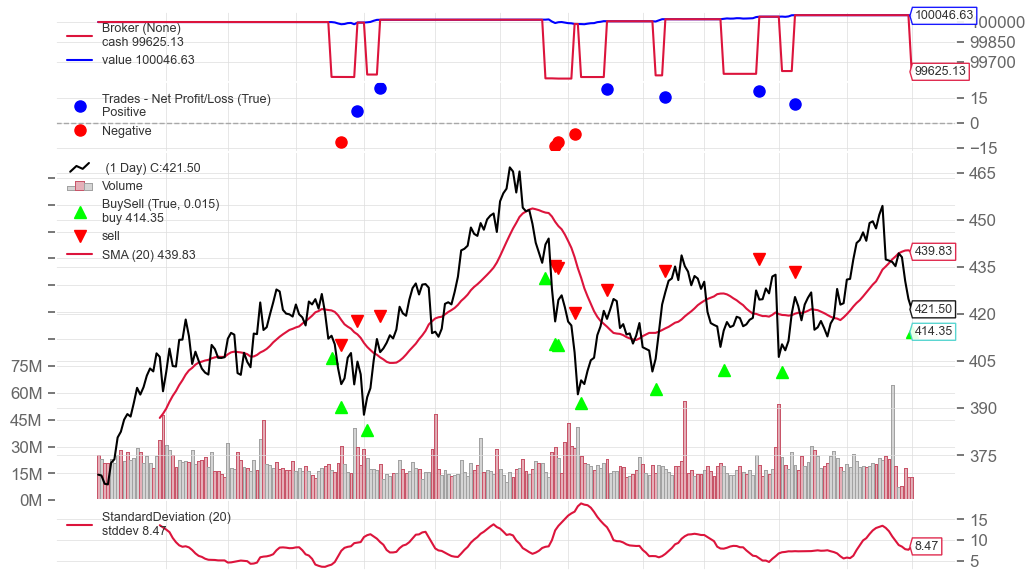

In [53]:
# Set up the backtest engine (Cerebro)
cerebro = bt.Cerebro()

# Add the data feed and the strategy
cerebro.adddata(data_feed)
cerebro.addstrategy(Strategy)

cerebro.broker.setcash(100000)  # Initial cash
cerebro.broker.setcommission(commission=0.001)  # Commission per trade

# Run the backtest
cerebro.run()

import matplotlib.pyplot as plt

# After running cerebro.run()
%matplotlib inline
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
cerebro.plot()
plt.show()

In [54]:
final_cash = cerebro.broker.get_cash()
print(f"Final cash value: {final_cash}")

Final cash value: 99625.12619091434


In [55]:
class ShortingStrategy(bt.Strategy):
    def __init__(self):
        # Define Bollinger Bands and SMA
        self.sma = bt.indicators.SMA(self.data.close, period=20)
        self.std = bt.indicators.StandardDeviation(self.data.close, period=20)
        self.upper_band = self.sma + (2 * self.std)
        self.lower_band = self.sma - (2 * self.std)

        # Track position status and price details
        self.position_flag = 0
        self.entry_price = None
        self.lowest_price = None  # For trailing stop tracking

    def next(self):
        # Trailing stop condition (for active short position)
        if self.position_flag == -1:  # Short position is open
            # Update the lowest price since entry
            self.lowest_price = min(self.lowest_price, self.data.close[0])

            # If price rises more than 2% above the lowest price, buy to cover (exit the short)
            if self.data.close[0] > self.lowest_price * 1.02:
                self.buy()  # Exit the short position with a trailing stop
                self.position_flag = 0
                self.entry_price = None
                self.lowest_price = None  # Reset trailing stop

        # Short (Sell) condition: When price is above the upper Bollinger Band and no open position
        elif self.data.close[0] > self.upper_band[0] and self.position_flag == 0:
            self.position_flag = -1  # Short position opened
            self.sell()  # Enter short position
            self.entry_price = self.data.close[0]
            self.lowest_price = self.data.close[0]  # Initialize lowest price for trailing stop

        # Buy to cover condition: When price crosses the SMA and position is open
        elif self.data.close[0] <= self.sma[0] and self.position_flag == -1:
            self.buy()  # Exit the short position
            self.position_flag = 0
            self.entry_price = None
            self.lowest_price = None  # Reset lowest price for trailing stop

<IPython.core.display.Javascript object>

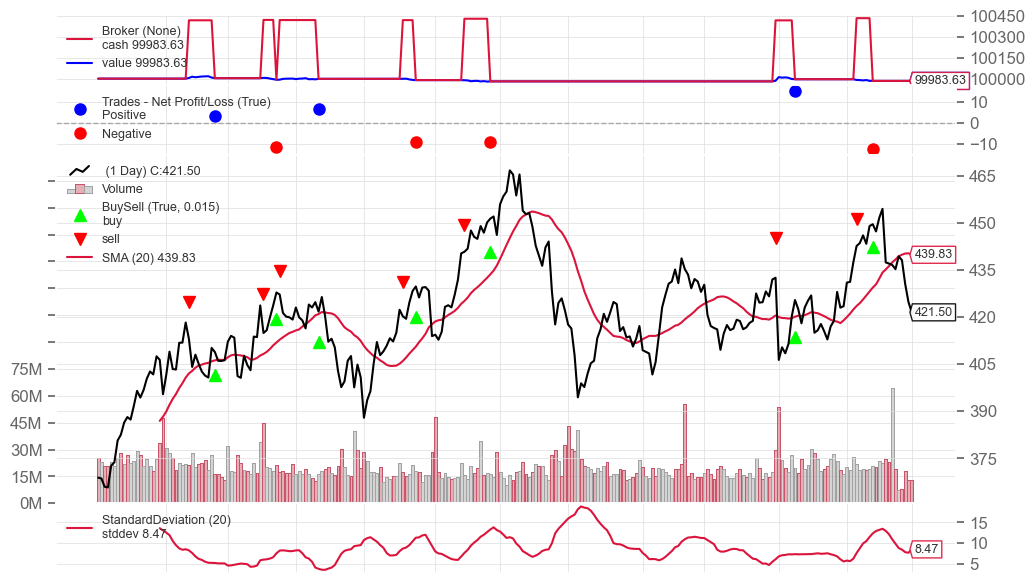

In [56]:
# Set up the backtest engine (Cerebro)
cerebro = bt.Cerebro()

# Add the data feed and the strategy
cerebro.adddata(data_feed)
cerebro.addstrategy(ShortingStrategy)

cerebro.broker.setcash(100000)  # Initial cash
cerebro.broker.setcommission(commission=0.001)  # Commission per trade

# Run the backtest
cerebro.run()

import matplotlib.pyplot as plt

# After running cerebro.run()
%matplotlib inline
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
cerebro.plot()
plt.show()

In [57]:
final_cash = cerebro.broker.get_cash()
print(f"Final cash value: {final_cash}")

Final cash value: 99983.62775265347
